In [24]:
%load_ext autoreload
%autoreload 2
import os
from os.path import join as oj
import pickle as pkl
from typing import Dict, Any

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import dvu
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 250

# change working directory to project root
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('../..')
from experiments.notebooks import viz
from experiments.data_util import get_clean_dataset
from experiments.config.datasets import DATASETS_CLASSIFICATION, DATASETS_REGRESSION
print('num_datasets', len(DATASETS_CLASSIFICATION), len(DATASETS_REGRESSION))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
num_datasets 9 4


In [28]:
# run comparison aggregations
!python "../01_aggregate_comparisons.py"

processing path /Volumes/GoogleDrive/My Drive/research/rules/imodels/experiments/results/reg_data/breast-cancer/train-test
processing path /Volumes/GoogleDrive/My Drive/research/rules/imodels/experiments/results/reg_data/credit-g/train-test
processing path /Volumes/GoogleDrive/My Drive/research/rules/imodels/experiments/results/reg_data/haberman/train-test
processing path /Volumes/GoogleDrive/My Drive/research/rules/imodels/experiments/results/reg_data/heart/train-test
No files found to concatenate at  /Volumes/GoogleDrive/My Drive/research/rules/imodels/experiments/results/reg_data/recidivism/train-test
No files found to concatenate at  /Volumes/GoogleDrive/My Drive/research/rules/imodels/experiments/results/reg_data/credit/train-test
No files found to concatenate at  /Volumes/GoogleDrive/My Drive/research/rules/imodels/experiments/results/reg_data/juvenile/train-test
processing path /Volumes/GoogleDrive/My Drive/research/rules/imodels/experiments/results/reg_data/diabetes/train-test


# classification

skipping recidivism
skipping credit
skipping juvenile
skipping readmission
skipping ionosphere


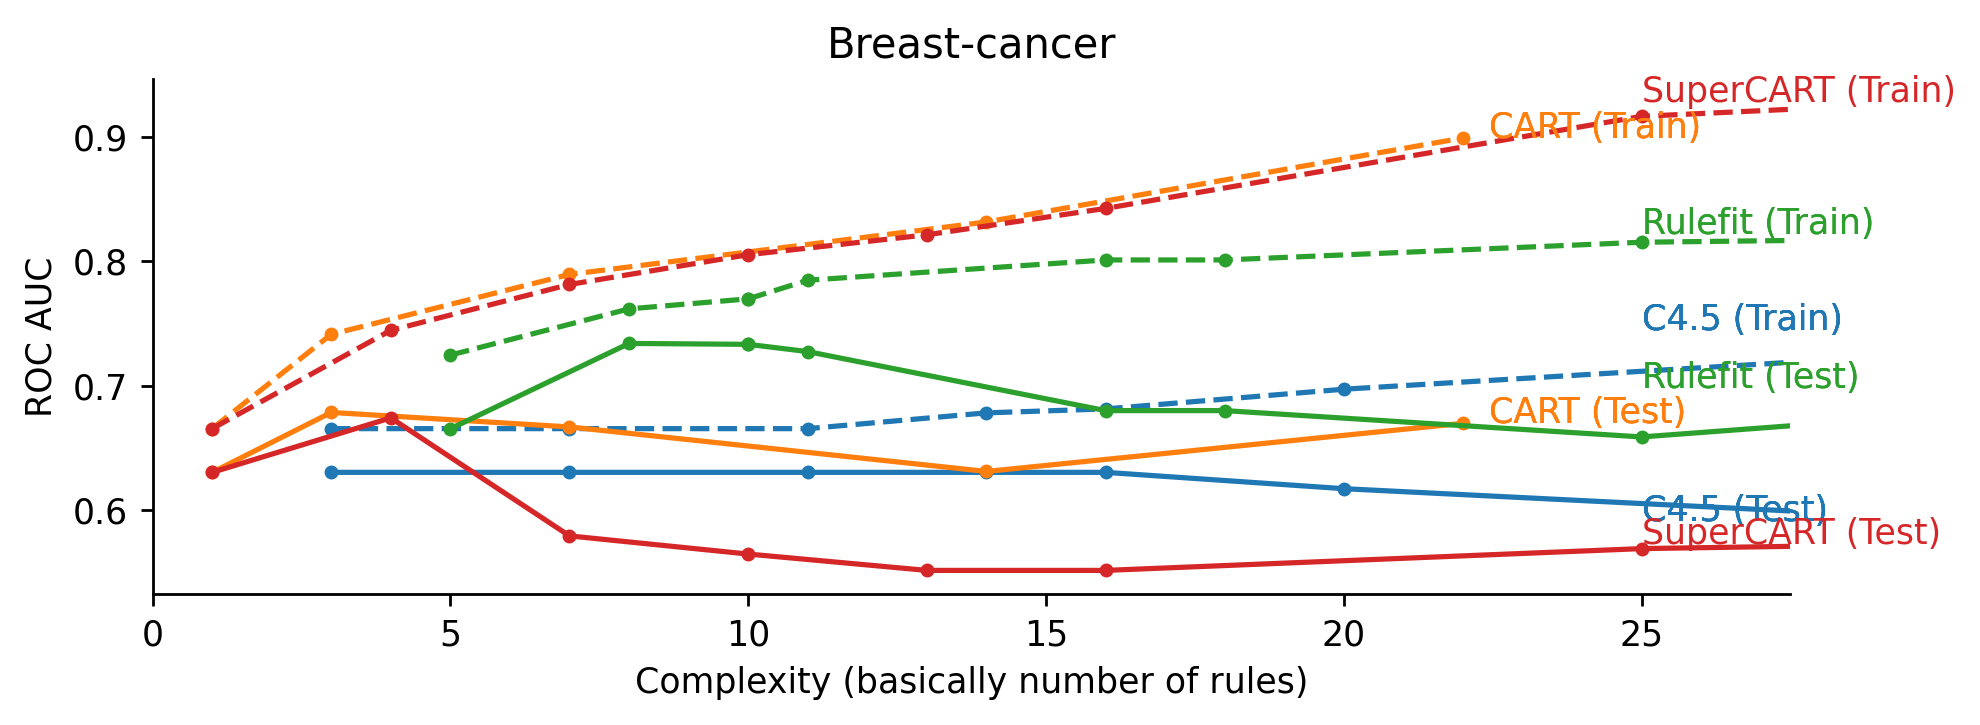

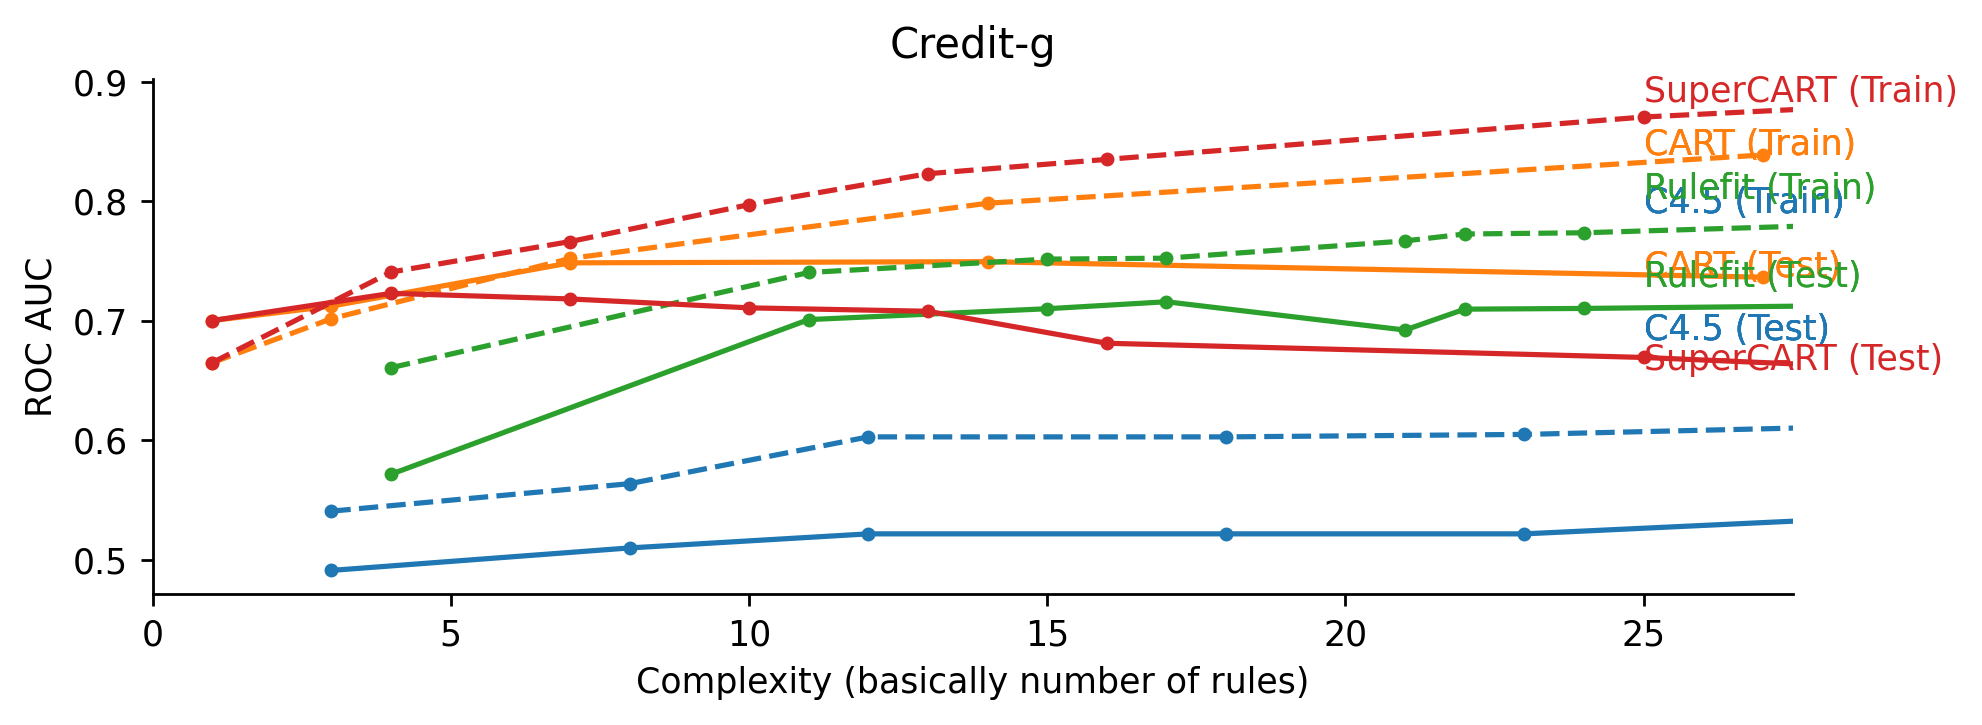

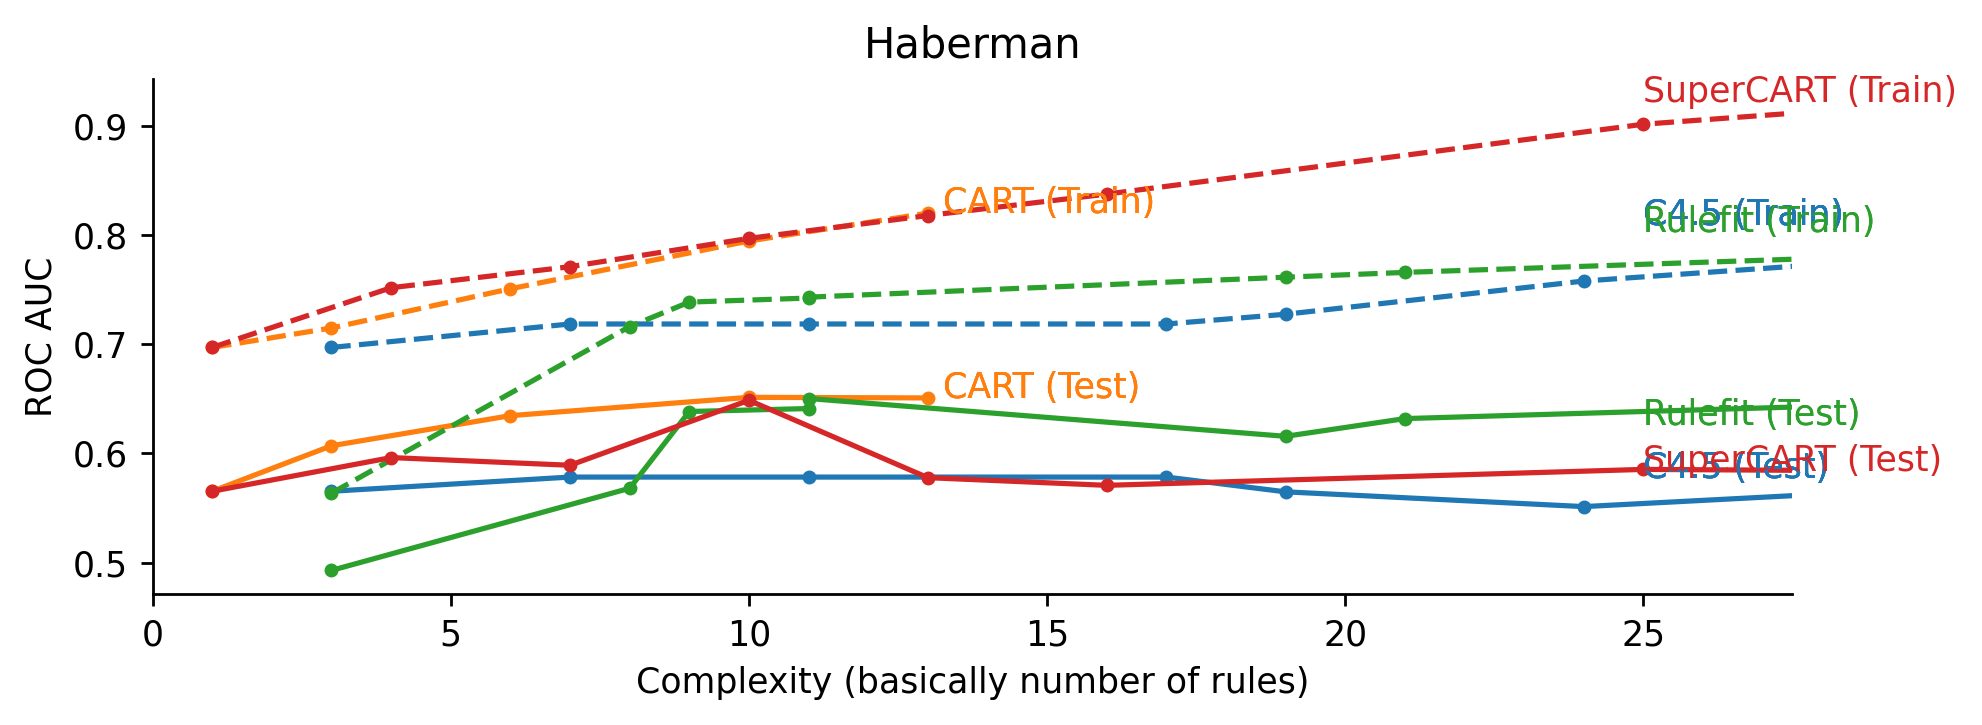

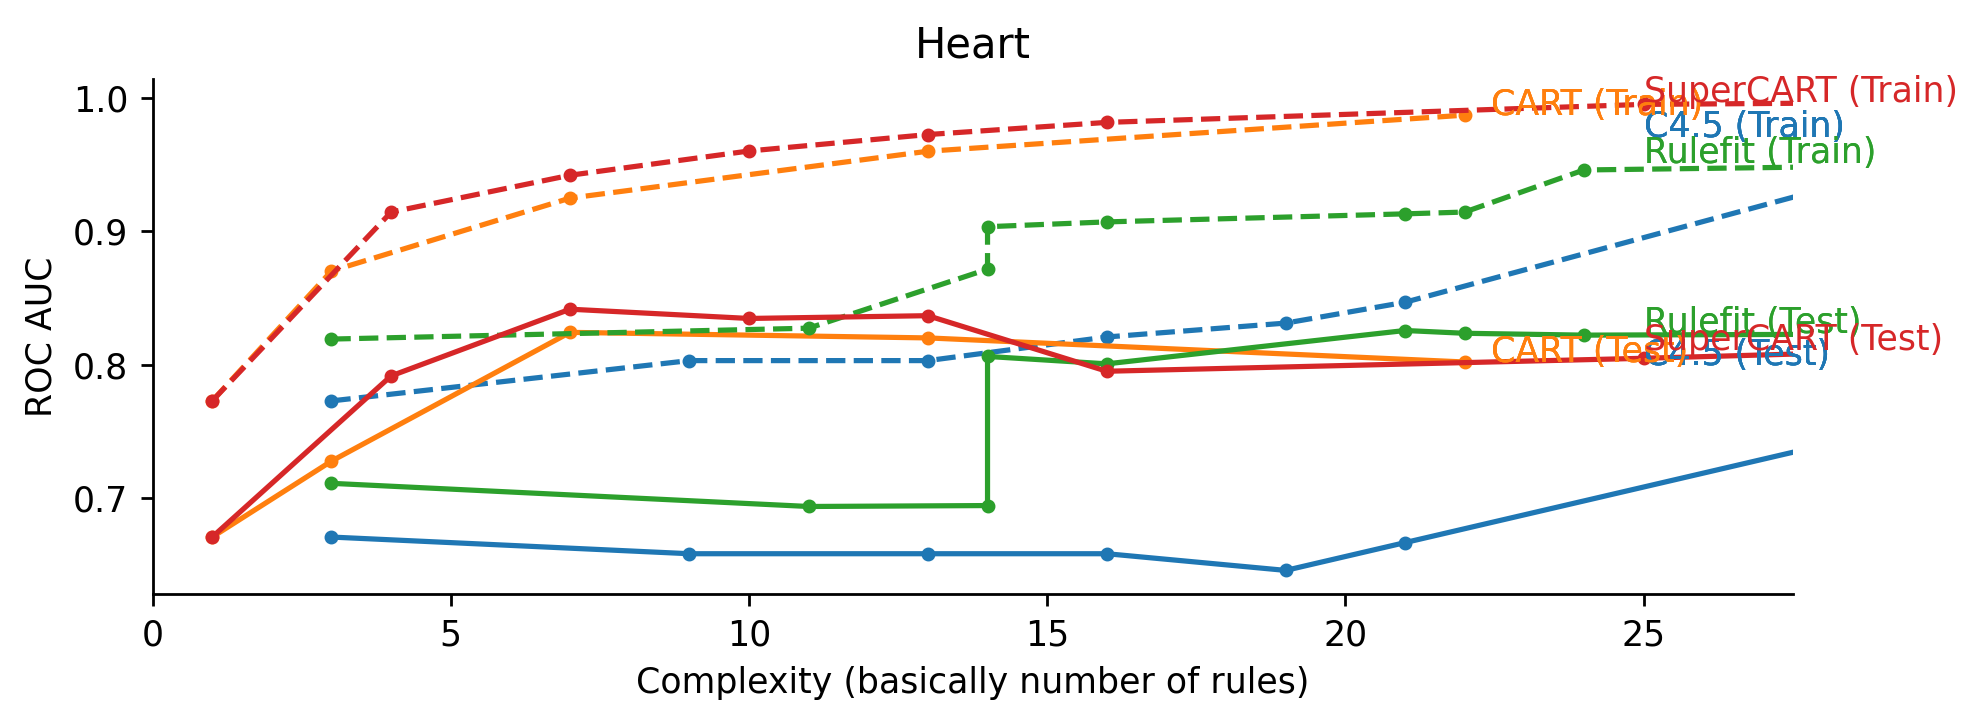

In [29]:
metric = 'rocauc'
for dset in DATASETS_CLASSIFICATION:
    dset_name = dset[0]
    try:
        pkl_file = oj('../results', 'reg_data', dset_name, 'train-test/combined.pkl')
        df = pkl.load(open(pkl_file, 'rb'))['df']
        df['model'] = df.index

    #     print(list(df.keys()))
        plt.figure(figsize=(8, 3))
    #     R, C = 1, 2
        for i, (name, g) in enumerate(df.groupby('model')):
            args = np.argsort(g[f'{dset_name}_complexity'])
            plt.title(dset_name.capitalize())
            kwargs = dict(color=colors[i])
            plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_test'][args], '.-', **kwargs, label=name + ' (Test)')
            plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_train'][args], '.--', **kwargs, label=name + ' (Train)')
            plt.xlabel('Complexity (basically number of rules)')
            plt.xlim((0, 25))
            plt.ylabel('ROC AUC')
            dvu.line_legend(fontsize=10)
        plt.show()
    except:
        print('skipping', dset_name)

In [22]:
metric = 'accuracy'
for dset in DATASETS_CLASSIFICATION:
    dset_name = dset[0]
    pkl_file = oj('../results', 'reg_data', dset_name, 'train-test/combined.pkl')
    df = pkl.load(open(pkl_file, 'rb'))['df']
    df['model'] = df.index
    
#     print(list(df.keys()))
    plt.figure(figsize=(8, 3))
#     R, C = 1, 2
    for i, (name, g) in enumerate(df.groupby('model')):
        args = np.argsort(g[f'{dset_name}_complexity'])
        plt.title(dset_name.capitalize())
        kwargs = dict(color=colors[i])
        plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_test'][args], '.-', **kwargs, label=name + ' (Test)')
#         plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_train'][args], '.--', **kwargs, label=name + ' (Train)')
        plt.xlabel('Complexity (basically number of rules)')
        plt.xlim((0, 25))
        plt.ylabel('accuracy')
        dvu.line_legend(fontsize=10)

FileNotFoundError: [Errno 2] No such file or directory: '../results/reg_data/recidivism/train-test/combined.pkl'

# regression

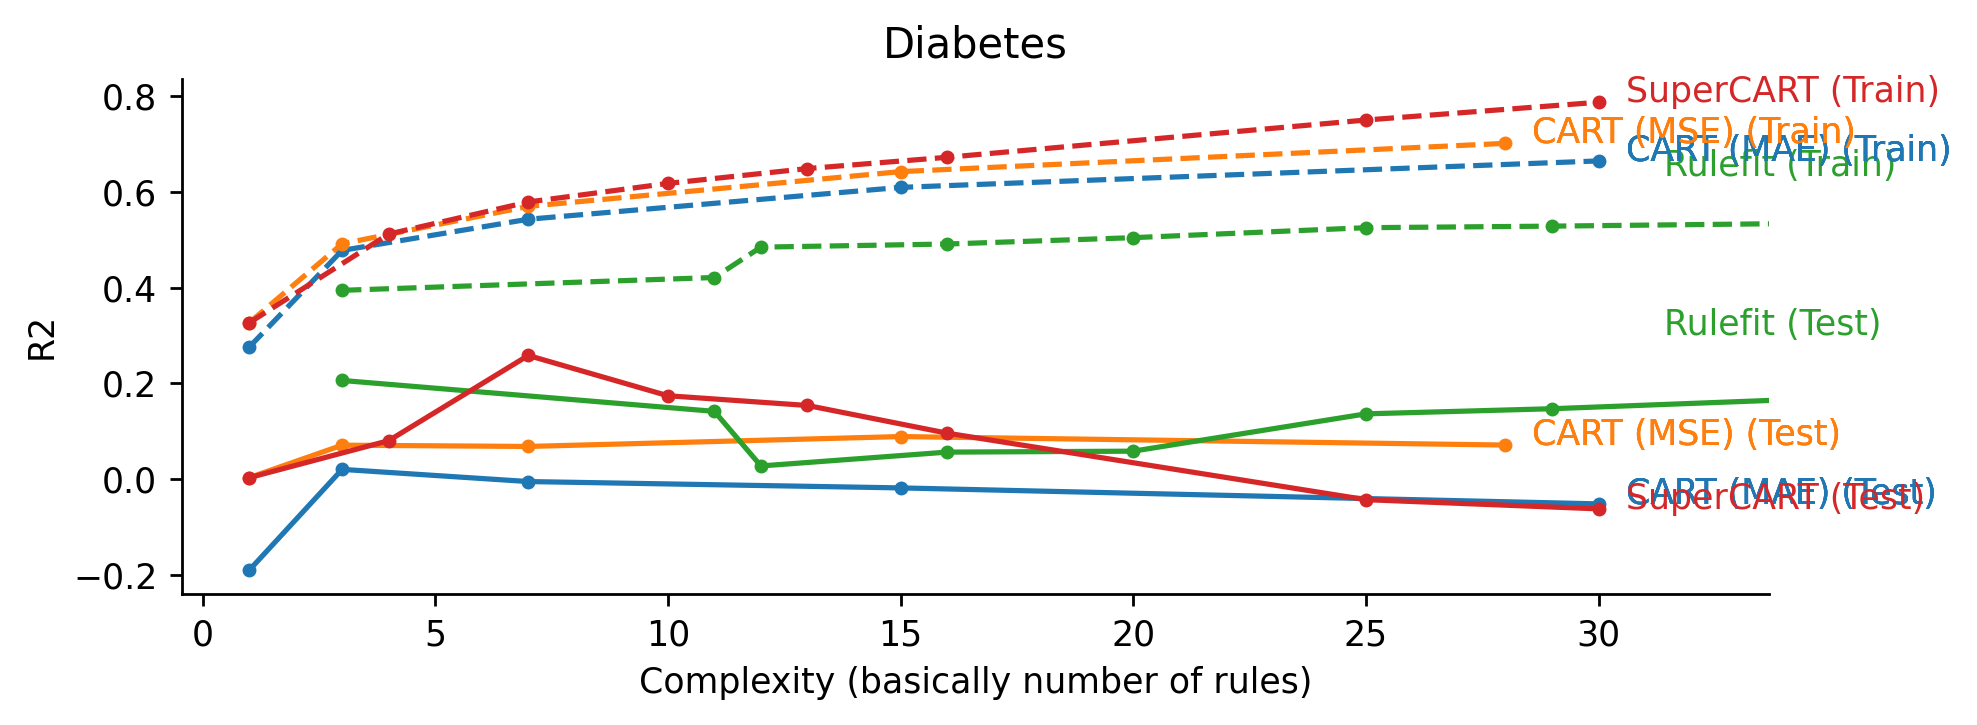

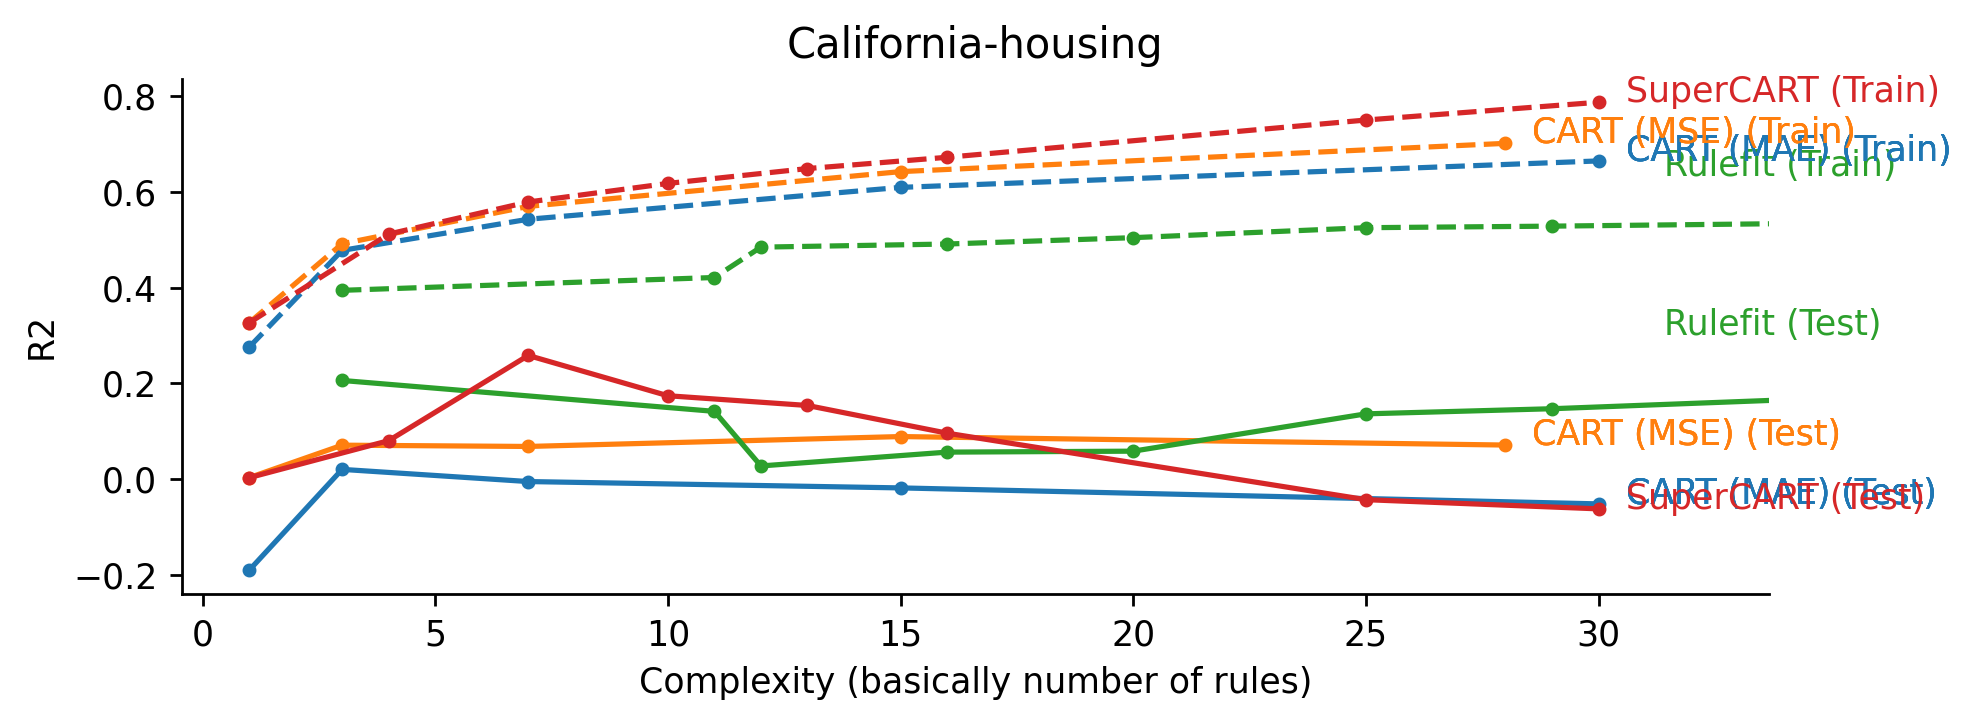

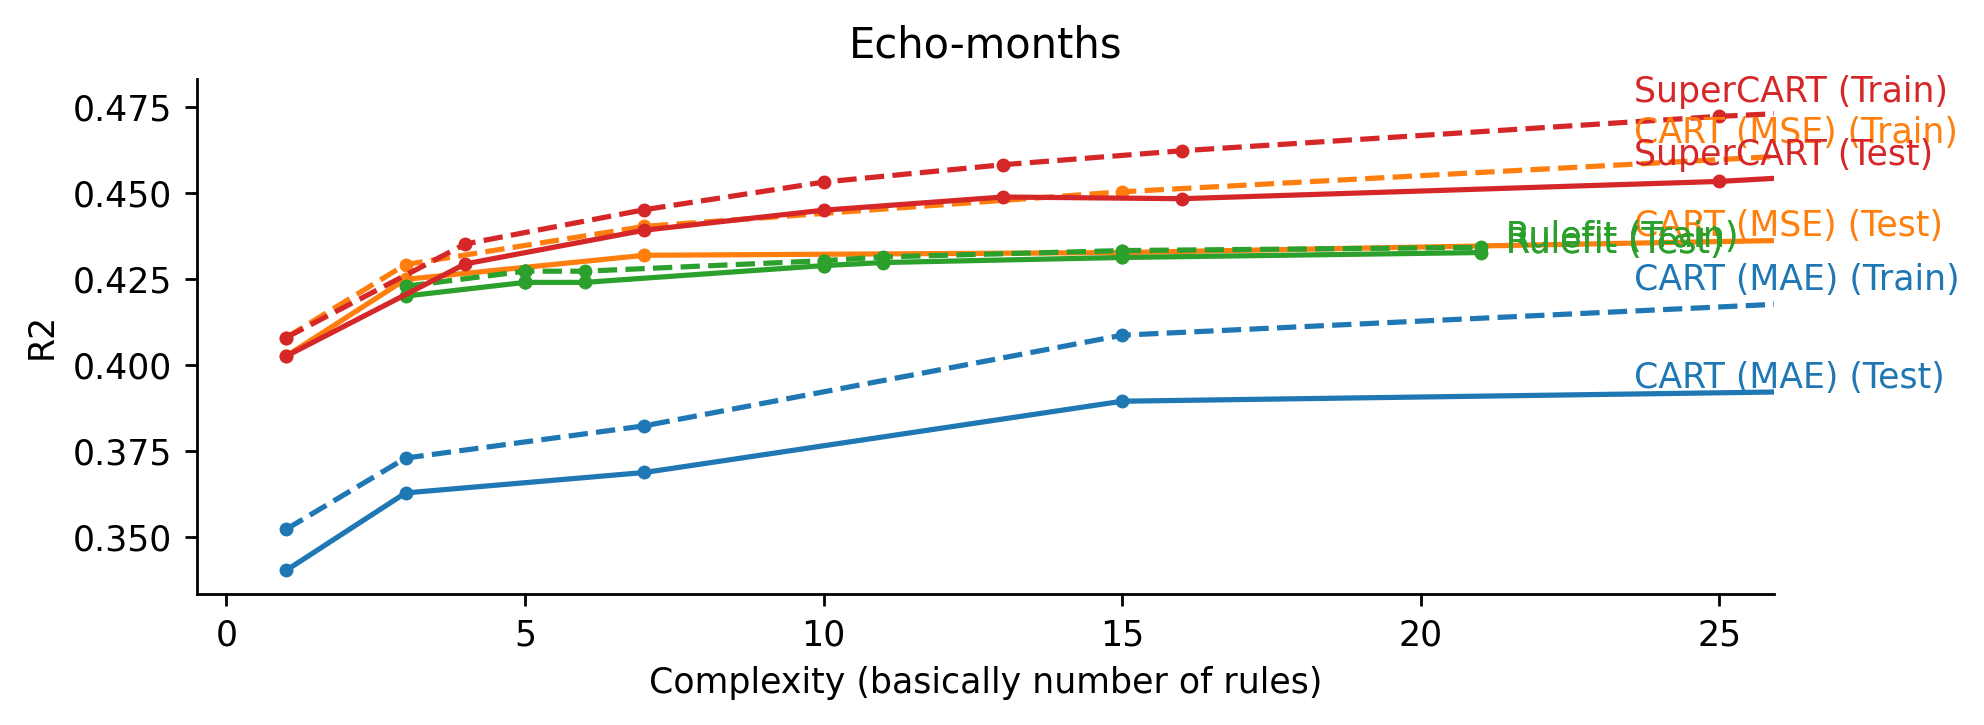

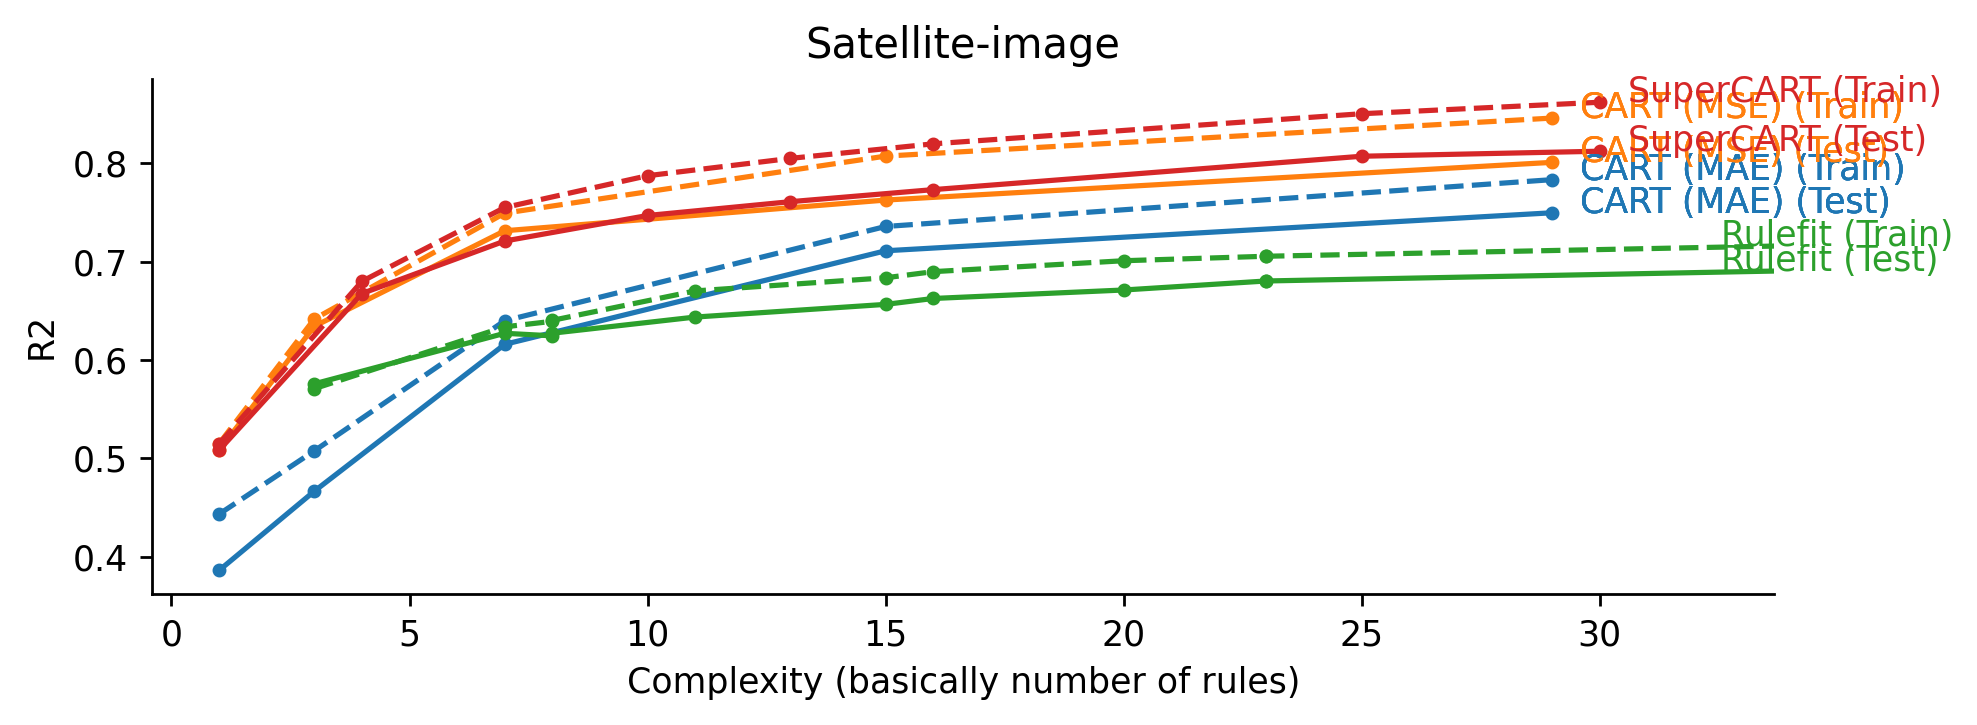

In [26]:
metric = 'r2'
for dset in DATASETS_REGRESSION:
    dset_name = dset[0]
    pkl_file = oj('../results', 'reg_data', dset_name, 'train-test/combined.pkl')
    df = pkl.load(open(pkl_file, 'rb'))['df']
    df['model'] = df.index
    
    plt.figure(figsize=(8, 3))
#     R, C = 1, 2
    for i, (name, g) in enumerate(df.groupby('model')):
        args = np.argsort(g[f'{dset_name}_complexity'])
        plt.title(dset_name.capitalize())
        kwargs = dict(color=colors[i])
        plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_test'][args], '.-', **kwargs, label=name + ' (Test)')
        plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_train'][args], '.--', **kwargs, label=name + ' (Train)')
        plt.xlabel('Complexity (basically number of rules)')
#         plt.xlim((0, 25))
        plt.ylabel('R2')
        dvu.line_legend(fontsize=10)

In [13]:
df

,n_estimators,satellite-image_r2_train,satellite-image_explained_variance_train,satellite-image_neg_mean_squared_error_train,satellite-image_r2_test,satellite-image_explained_variance_test,satellite-image_neg_mean_squared_error_test,satellite-image_complexity,satellite-image_time,mean_r2,mean_explained_variance,mean_neg_mean_squared_error,mean_complexity,mean_time,max_depth,max_rules,model
Rulefit,1.0,0.585651,0.585651,2.042590,0.589270,0.589460,1.966286,3,0.016012,0.587461,0.587555,2.004438,3.0,0.016012,NaN,NaN,Rulefit
Rulefit,2.0,0.650110,0.650110,1.724829,0.642017,0.642044,1.713773,7,0.037675,0.646063,0.646077,1.719301,7.0,0.037675,NaN,NaN,Rulefit
Rulefit,3.0,0.655744,0.655744,1.697056,0.639446,0.639449,1.726081,8,0.051787,0.647595,0.647597,1.711568,8.0,0.051787,NaN,NaN,Rulefit
Rulefit,4.0,0.656584,0.656584,1.692915,0.642139,0.642140,1.713186,8,0.069224,0.649362,0.649362,1.703051,8.0,0.069224,NaN,NaN,Rulefit
Rulefit,5.0,0.687194,0.687194,1.542020,0.658961,0.659000,1.632655,13,0.066861,0.673078,0.673097,1.587337,13.0,0.066861,NaN,NaN,Rulefit
Rulefit,6.0,0.701245,0.701245,1.472752,0.671094,0.671094,1.574574,17,0.072417,0.686169,0.686169,1.523663,17.0,0.072417,NaN,NaN,Rulefit
Rulefit,7.0,0.708142,0.708142,1.438755,0.677855,0.677861,1.542206,20,0.096157,0.692998,0.693001,1.490481,20.0,0.096157,NaN,NaN,Rulefit
Rulefit,8.0,0.725054,0.725054,1.355381,0.691395,0.691396,1.477384,22,0.103642,0.708225,0.708225,1.416383,22.0,0.103642,NaN,NaN,Rulefit
Rulefit,9.0,0.730080,0.730080,1.330606,0.702926,0.702940,1.422185,28,0.136808,0.716503,0.716510,1.376395,28.0,0.136808,NaN,NaN,Rulefit
Rulefit,10.0,0.730080,0.730080,1.330608,0.702925,0.702940,1.422186,28,0.142669,0.716502,0.716510,1.376397,28.0,0.142669,NaN,NaN,Rulefit
